In [236]:
from PIL import Image

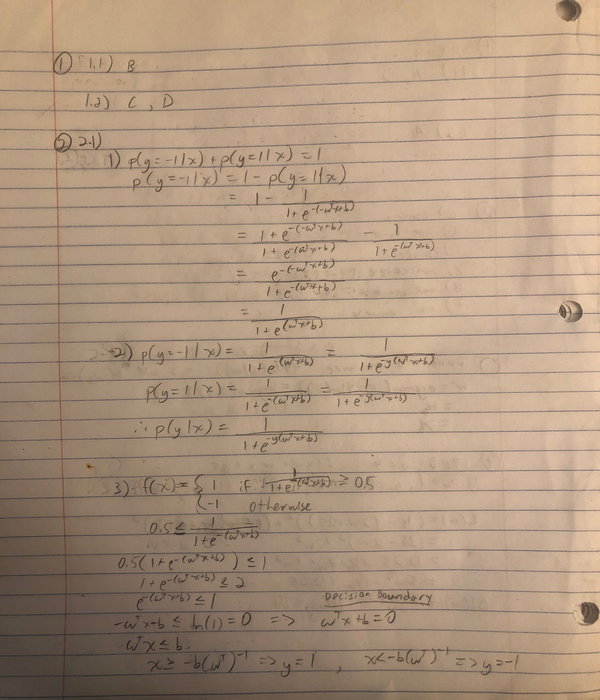

In [240]:
img = Image.open("IMG_3340.JPG")
img = img.transpose(Image.ROTATE_270)
img = img.resize((600,700),Image.ANTIALIAS)
img

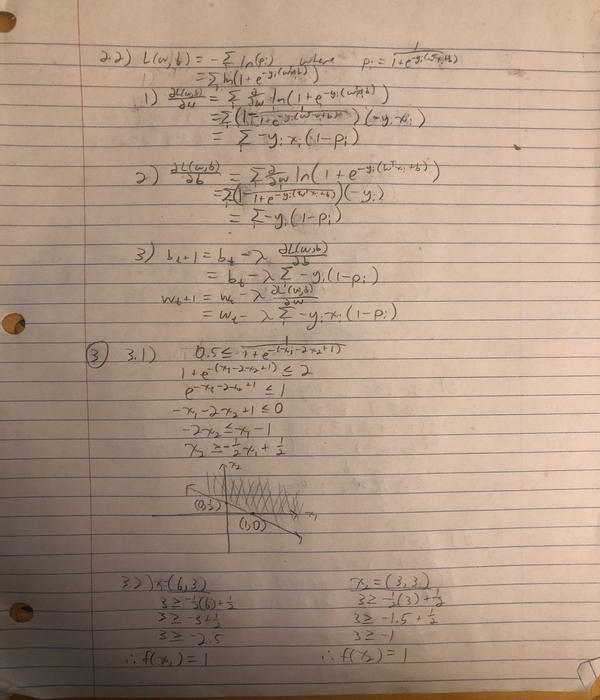

In [241]:
img = Image.open("IMG_3341.JPG")
img = img.transpose(Image.ROTATE_270)
img = img.resize((600,700),Image.ANTIALIAS)
img

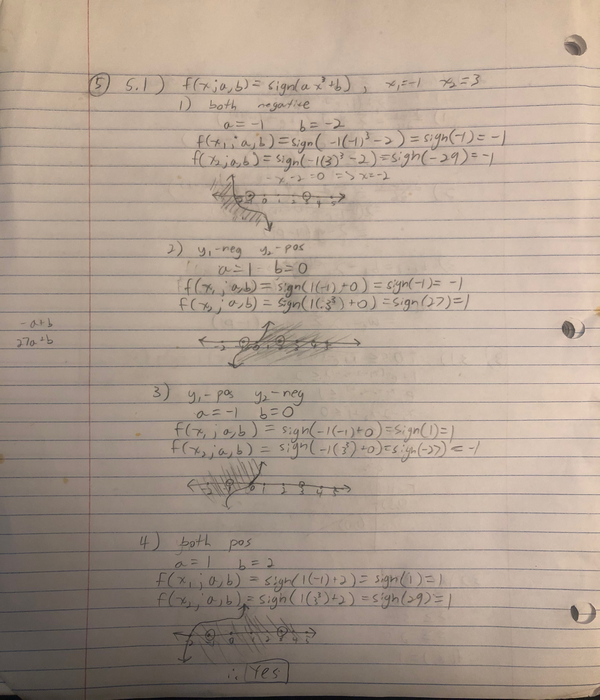

In [242]:
img = Image.open("IMG_3342.JPG")
img = img.transpose(Image.ROTATE_270)
img = img.resize((600,700),Image.ANTIALIAS)
img

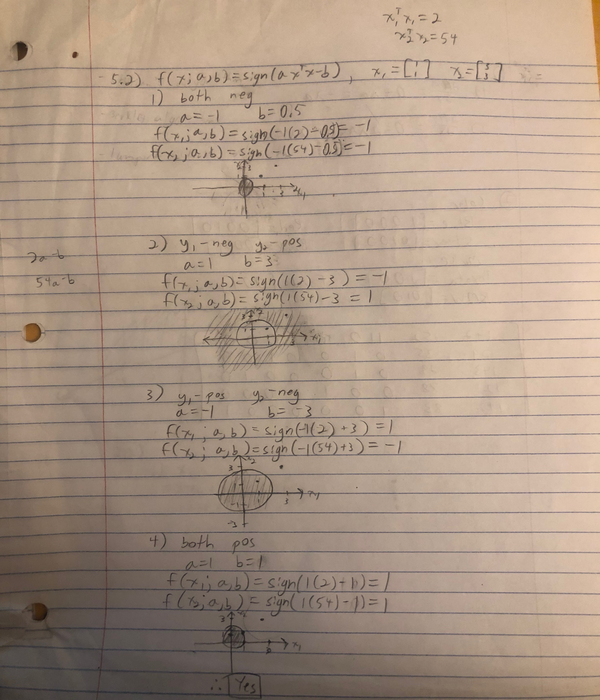

In [243]:
img = Image.open("IMG_3344.JPG")
img = img.transpose(Image.ROTATE_270)
img = img.resize((600,700),Image.ANTIALIAS)
img

## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.utils import shuffle
import scipy.io as sio
plt.rcParams['figure.figsize'] = 8,8

### Original Data

In [2]:
X_and_Y_train = np.load('./logistic-train.npy')
X_train = X_and_Y_train[:, :2]    # Shape: (70,2)
Y_train = X_and_Y_train[:, 2]    # Shape: (70,)
Y_train = 2 * Y_train - 1        # Convert (0, 1) to (-1, 1)
#print(X_and_Y_train.shape, X_train.shape, Y_train.shape)

In [3]:
X_and_Y_test = np.load('./logistic-test.npy')
X_test = X_and_Y_test[:, :2]   # Shape: (70,2)
Y_test = X_and_Y_test[:, 2]    # Shape: (70,)
Y_test = 2 * Y_test - 1        # Convert (0, 1) to (-1, 1)
#print(X_and_Y_test.shape, X_test.shape, Y_test.shape)

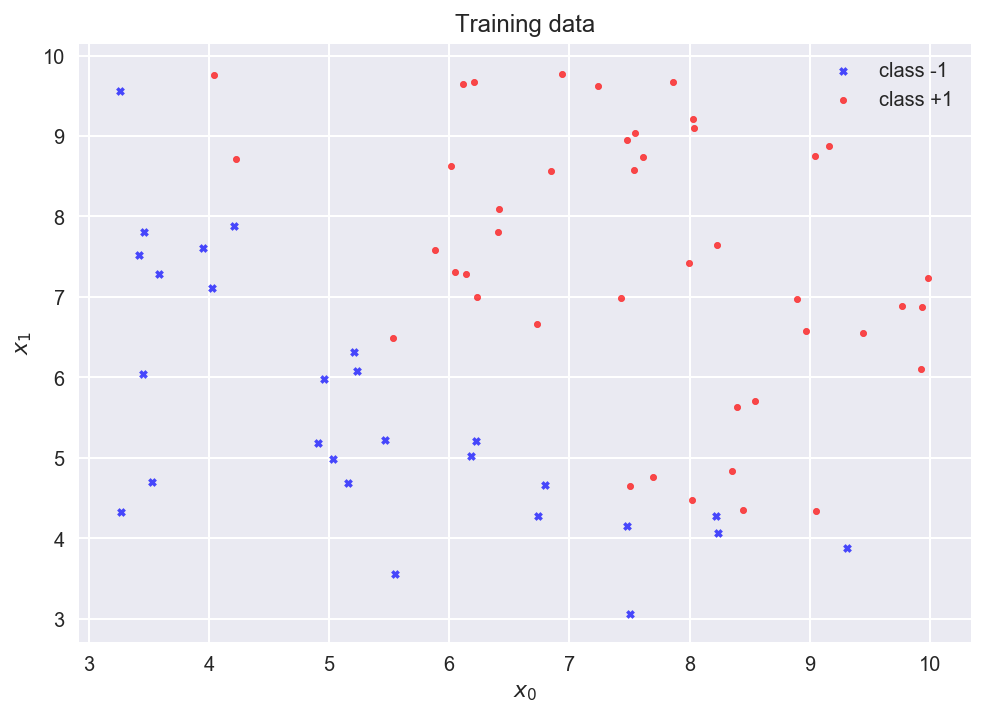

In [4]:
mpl.style.use('seaborn')

fig = plt.figure()
plt.scatter(X_train[Y_train==-1, 0], X_train[Y_train==-1, 1], marker='x', color='b', alpha=0.7, s=10, label='class -1')
plt.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], marker='o', color='r', alpha=0.7, s=10, label='class +1')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend(loc='upper right', fontsize=10)
plt.title('Training data')
plt.show()
#fig.savefig('scatter_1.png', format='png', dpi=400)

### Gradient Descent

In [5]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [226]:
# gradient of loss function L(w, b)
def L_prime_w_b(X, Y, w, b):
    ########### YOUR CODE HERE ###########
    # This function returns the tuple(gradient for w, gradient for b)
    #####################################
    #print(w.shape)
    grad_w = np.zeros(X[1].shape)
    grad_b = 0
    for i in range(len(Y)):
        x = X[i]
        z = Y[i] * (w.T.dot(X[i]) + b)
        h = sigmoid(z)
        grad_w = grad_w - Y[i] * X[i] * (1 - h)
        grad_b = grad_b - Y[i] * (1 - h)
    #print(grad_w.reshape((-1, 1)).shape)
    return (grad_w.reshape((-1, 1)), grad_b)

In [227]:
def L_w_b(X, Y, w, b):
    ########### YOUR CODE HERE ###########
    L = 0
    for i in range(len(Y)):
        x = X[i]
        z = Y[i] * (w.T.dot(x) + b) 
        h = sigmoid(z)
        L = L - np.log(h)
    return L

In [228]:
learning_rate = 0.001
n_iter = 10000
w = np.zeros((X_train.shape[1], 1))
b = 0

# We will keep track of training loss over iterations
iterations = [0]
L_w_b_list = [L_w_b(X_train, Y_train, w, b)]
for i in range(n_iter):
    gradient_w, gradient_b = L_prime_w_b(X_train, Y_train, w, b)
    w_new = w - learning_rate * gradient_w
    b_new = b - learning_rate * gradient_b
    iterations.append(i+1)
    L_w_b_list.append(L_w_b(X_train, Y_train, w_new, b_new))

    if np.linalg.norm(w_new - w, ord = 1) + abs(b_new - b) < 0.001:
        print("gradient descent has converged after " + str(i) + " iterations")
        break
    w = w_new
    b = b_new
    
print ("w vector: \n" + str(w))
print ("b: \n" + str(b))

gradient descent has converged after 6365 iterations
w vector: 
[[0.97466299]
 [0.88907048]]
b: 
[-11.48322099]


### Training curve

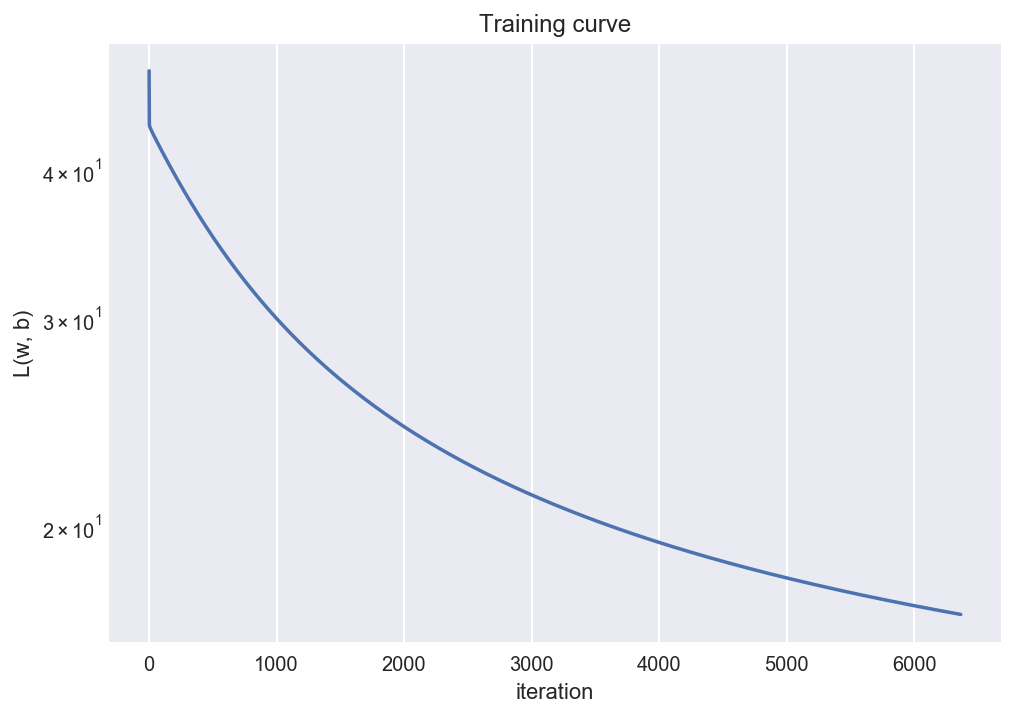

In [229]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(w, b)')
plt.semilogy(iterations, np.array(L_w_b_list).reshape(-1, 1))
plt.show()

### Results on Training data

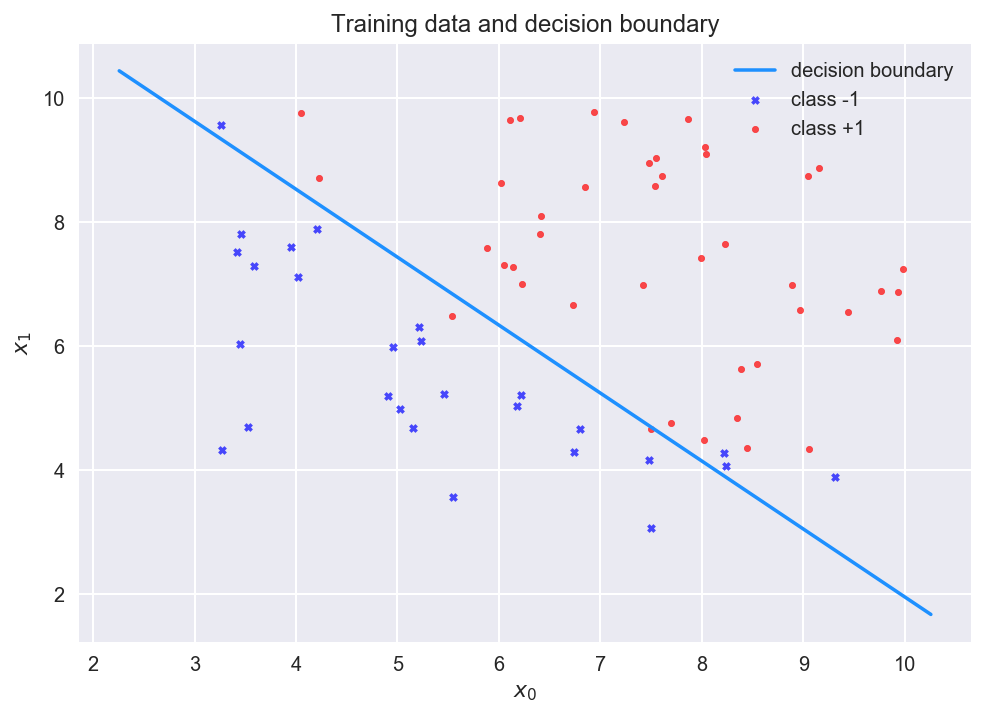

In [230]:
prediction = sigmoid(np.dot(X_train, w) + b) >= 0.5
prediction = 2 * prediction - 1                     # Convert (0, 1) to (-1, 1)

testing_accuracy = np.sum(prediction == Y_train.reshape(-1, 1))*1.0/X_train.shape[0]

x = np.arange(np.min(X_train[:,0])-1,np.max(X_train[:,0])+1,1.0)
y = (-b[0]-w[0][0]*x)/w[1][0]
plt.scatter(X_train[Y_train==-1, 0], X_train[Y_train==-1, 1], marker='x', color='b', alpha=0.7, s=10, label='class -1')
plt.scatter(X_train[Y_train==1, 0], X_train[Y_train==1, 1], marker='o', color='r', alpha=0.7, s=10, label='class +1')


plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.plot(x,y, 'dodgerblue', label='decision boundary')
plt.title('Training data and decision boundary')

plt.legend(loc='upper right', fontsize=10)

### Results on Testing data

testing accuracy: 0.8333333333333334


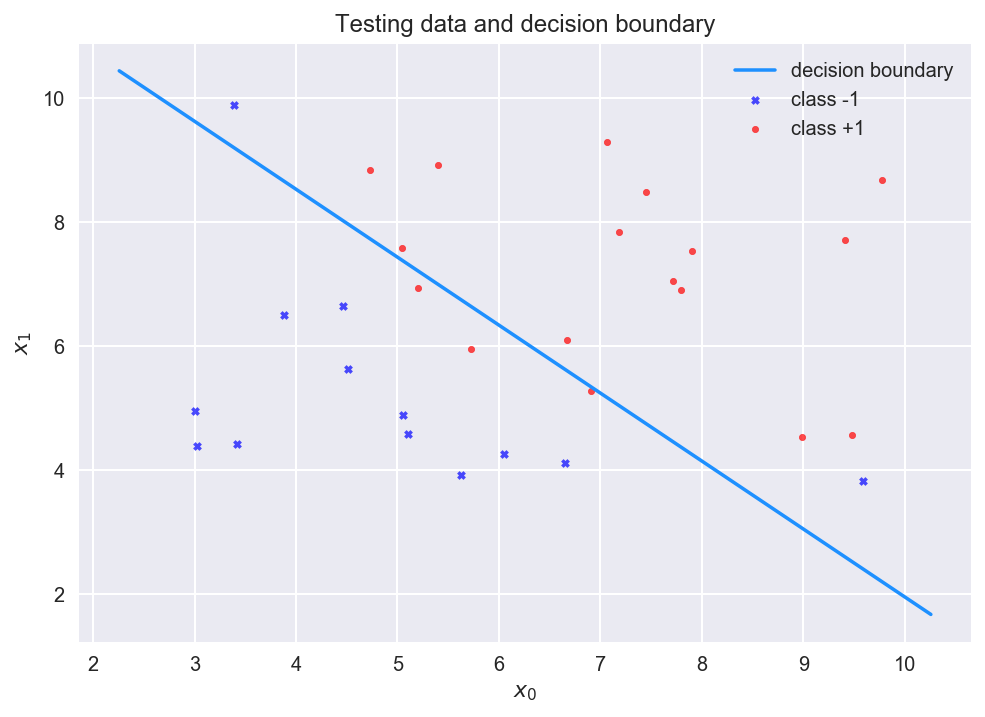

In [231]:
prediction = sigmoid(np.dot(X_test, w) + b) >= 0.5
prediction = 2 * prediction - 1                     # Convert (0, 1) to (-1, 1)
testing_accuracy = np.sum(prediction == Y_test.reshape(-1, 1))*1.0/X_test.shape[0]
print ("testing accuracy: " + str(testing_accuracy))

x = np.arange(np.min(X_train[:,0])-1,np.max(X_train[:,0])+1,1.0)
y = (-b[0]-w[0][0]*x)/w[1][0]
plt.scatter(X_test[Y_test==-1, 0], X_test[Y_test==-1, 1], marker='x', color='b', alpha=0.7, s=10, label='class -1')
plt.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], marker='o', color='r', alpha=0.7, s=10, label='class +1')


plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.plot(x,y, 'dodgerblue', label='decision boundary')
plt.title('Testing data and decision boundary')

plt.legend(loc='upper right', fontsize=10)